##  Ex10: Pour le modèle de Wright-Fisher, représenter graphiquement la proportion de la taille valide en fonction de la proportion de mâles dans la population.

### 1) Un peu de préambule

#### Taille consensus et taille valide/effective

Un postulat du modèle de Wright-Fisher est que le nombre de mâles et de femelles est équivalent. On peut appeler "taille consensus" la somme de tous les individus de la popualation. Toutefois, dans une popualtion, tous les individus ne contribuent pas aux gamètes de la génération suivante (comportements reproductifs). On appelle taille valide ou effective le nombre d'individus contribuant au pool de gamètes (se reproduisant).

#### Le ratio de sexe

Typiquement, tous les mâles d'une population ne se reproduise pas. Dès lors, la taille effective (Ne) est plus petite que la taille consensus. Le "breeding ratio" influe la Ne suivant la relation suivante :

Ne = 4 * ( NmNf/ (Nm+Nf) )

où Nm et Nf représente respectivement le nombre de mâles et femelles se reproduisant

#### Exemple

21 elephants se reproduisant (71 observés) pour 550 femelles. La Ne est de 80,9 c'est à dire une population idéale de Wright-Fisher avec 40 males et 40 femelles

### 2) Modelling la proportion de mâle dans une population 

In [63]:
import random 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Paramètres de la simulation

In [84]:
N = 1000

#### Fonction : Population effective sur base de la proportion de mâles dans la population 

In [70]:
def Get_Ne(Size_pop, percent_males) :
    Nm = Size_pop * (percent_males/100)
    Nf = Size_pop - Nm
    Ne = 4*( (Nm*Nf) / (Nm + Nf) )
    Ne = int(Ne) if ((int(Ne) % 2) == 0) else int(Ne) + 1 # Getting the closest even number
    return (Ne)

#### Un data frame

On crée un dataframe avec 100 rows (les % de 1 à 100) car on ne va tester que les % entier

In [85]:
df = pd.DataFrame({'percent_male' : [i for i in range(0, 101)],
                        'Ne' : [0 for steps in range(0, 101)]} ,  
                       columns= [ 'percent_male','Ne'])

#### Incrémente le dataframe avec les populations effectives

In [86]:
for i in range(0, 101):
    df.loc[df["percent_male"] == i, 'Ne'] += Get_Ne(N, i)

#### Visualisation

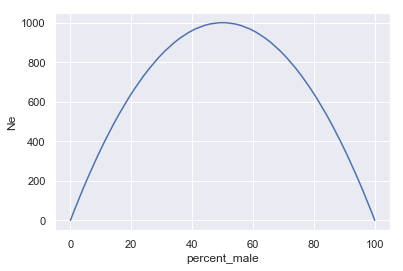

In [87]:
sns.set()
sns.lineplot(x = 'percent_male', y = 'Ne', data = df)
plt.xlim(-5, 105)
plt.show()